<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/People-Analytics---Turnover/blob/main/People_Analytics_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de People Analytics - Turnover

``
O objetivo deste projeto é realizar uma análise do turnover dos colaboradores da Empresa X e compreender quais áreas de atuação que podem ser exploradas para mitigar o impacto dessa variável na empresa. Inicialmente, nosso foco será uma abordagem descritiva, buscando entender os padrões e tendências de rotatividade dentro da organização. Ao longo do projeto, planejamos propor análises prescritivas, oferecendo recomendações acionáveis ​​para reduzir o impacto do faturamento. Embora não estejamos realizando uma análise financeira direta neste estágio, nossa meta é fornecer insights valiosos que podem ser aplicados estrategicamente para melhorar a retenção de talentos e a estabilidade organizacional.
``



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from google.colab import files


In [2]:
# Carregando o arquivo Excel em um DataFrame do pandas
caminho_arquivo = '/Base de colaboradores 2.xlsx'
dados = pd.read_excel('/Base de colaboradores 2.xlsx')

In [3]:
# Nomeando os Ativos e Desligados da base

dados['Status'] = dados['Situacao'].apply(lambda x: 'Ativo' if x == 1 else 'Desligado')


In [15]:
dados.head()

,Data Admissão,Tempo de Empresa,Sexo,Sexo_num,Escolaridade,Escolaridade_num,Estado Civil,Estado_Civil_num,Deficiente,Deficiente_num,Data de Nasc,IDADE,Atingimento BSC,Quantidade de Faltas,Quantidade de Atrasos,Quantidade de Atestados,Dias,Situacao,Data Desl/Cessão,Status
0,2016-09-12,6.309589,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1996-12-02,27.383562,0.41,2,1,7,2303,0,2023-01-02,Desligado
1,2017-09-11,5.312329,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Sim,0,1997-11-24,26.405479,0.05,3,6,0,1939,0,2023-01-02,Desligado
2,2017-12-04,5.115068,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1999-05-25,24.906849,0.38,3,7,2,1867,0,2023-01-14,Desligado
3,2022-11-11,0.142466,Feminino,0,Ensino Médio Completo,0.0,Casado,5,Não,1,1986-08-13,37.695890,0.74,2,1,3,52,0,2023-01-02,Desligado
4,2020-08-03,2.454795,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1991-01-07,33.290411,0.01,0,1,2,896,0,2023-01-16,Desligado


In [5]:
# Filtrando os dados removendo as categorias específicas da Escolaridade

dados_filtrados = dados[~dados['Escolaridade'].isin(['Ensino Médio Incompleto', 'Ensino Fundamental Completo'])]


In [6]:
import warnings
warnings.filterwarnings("ignore", message="Passing `palette` without assigning `hue` is deprecated")


In [7]:
# @title Nome das Variaveis
nomes_variaveis = dados.columns.tolist()
print("\n".join(nomes_variaveis))


Data Admissão
Tempo de Empresa
Sexo
Sexo_num
Escolaridade
Escolaridade_num
Estado Civil
Estado_Civil_num
Deficiente
Deficiente_num
Data de Nasc
IDADE
Atingimento BSC
Quantidade de Faltas
Quantidade de Atrasos
Quantidade de Atestados
Dias
Situacao
Data Desl/Cessão
Status


#Análise Descritiva

Vamos trabalhar nesse primeira etapa com uma análise descritiva dos dados.

In [30]:
dados.describe()

,Data Admissão,Tempo de Empresa,Sexo_num,Escolaridade_num,Estado_Civil_num,Deficiente_num,Data de Nasc,IDADE,Atingimento BSC,Quantidade de Faltas,Quantidade de Atrasos,Quantidade de Atestados,Dias,Situacao,Data Desl/Cessão
count,16500,16500.000000,16500.000000,16457.000000,16500.000000,16500.000000,16500,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500
mean,2021-04-15 07:33:38.618181888,2.945391,0.203152,0.218934,1.650970,0.981576,1995-06-27 06:51:08.509090944,28.818396,0.601395,2.761212,3.628303,1.599697,34.212061,0.937333,2021-05-19 12:39:00.654545664
min,2003-05-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1955-11-03 00:00:00,18.421918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2003-05-26 00:00:00
25%,2020-09-08 00:00:00,1.254795,0.000000,0.000000,1.000000,1.000000,1991-06-10 00:00:00,22.183562,0.300000,0.000000,1.000000,0.000000,0.000000,1.000000,2020-10-06 00:00:00
50%,2022-01-20 00:00:00,2.232877,0.000000,0.000000,1.000000,1.000000,1998-05-29 00:00:00,25.895890,0.600000,2.000000,3.000000,1.000000,0.000000,1.000000,2022-02-10 00:00:00
75%,2023-01-03 00:00:00,3.580822,0.000000,0.000000,1.000000,1.000000,2002-02-12 00:00:00,32.868493,0.900000,4.000000,6.000000,3.000000,0.000000,1.000000,2023-01-12 00:00:00
max,2023-12-12 00:00:00,20.901370,1.000000,3.000000,5.000000,1.000000,2005-11-16 00:00:00,68.493151,1.200000,10.000000,10.000000,7.000000,4327.000000,1.000000,2023-12-24 00:00:00
std,NaN,2.545953,0.402357,0.706513,1.456876,0.134484,NaN,8.816785,0.348296,2.777757,3.061142,1.592512,215.521155,0.242370,NaN


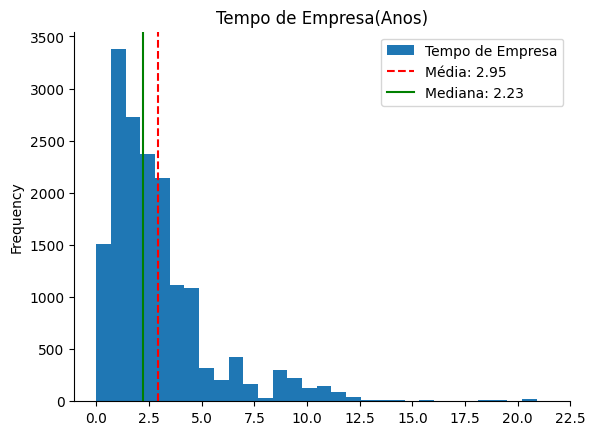

In [8]:
# @title Histograma Tempo de Empresa

# Calculando a média e mediana
media = dados['Tempo de Empresa'].mean()
mediana = dados['Tempo de Empresa'].median()

# Plotando o histograma com a média e a mediana
dados['Tempo de Empresa'].plot(kind='hist', bins=30, title='Tempo de Empresa(Anos)')

# Adicionando a linha vertical para a média e a mediana
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')
plt.legend()

# Definindo os ticks do eixo x com incrementos de 2.5
plt.xticks(np.arange(0, dados['Tempo de Empresa'].max() + 2.5, 2.5))

# Removendo as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


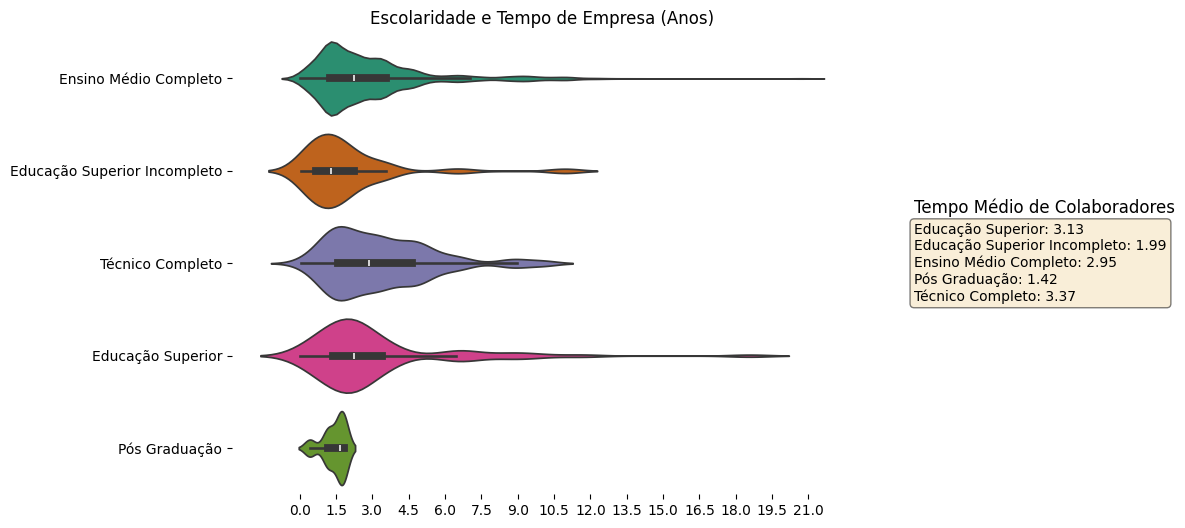

In [36]:
# @title Grafico de Tempo de Empresa por Escolaridade - ViolinPlot

# Calculando as médias para cada categoria de escolaridade
medias_por_escolaridade = dados_filtrados.groupby('Escolaridade')['Tempo de Empresa'].mean()

# Definindo o tamanho da figura
figsize = (8, 6)  # Largura x Altura em polegadas


# Plotando um gráfico com as modificações e adicionando um título
fig, ax = plt.subplots(figsize=figsize)
sns.violinplot(data=dados_filtrados, x='Tempo de Empresa', y='Escolaridade', hue='Escolaridade', inner='box', palette='Dark2', ax=ax, legend=False)
plt.title('Escolaridade e Tempo de Empresa (Anos)')

# Adicionando a caixa de texto com as médias ao lado do gráfico
textstr = '\n'.join(f'{escolaridade}: {media:.2f}' for escolaridade, media in medias_por_escolaridade.items())
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.1, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

# Adicionando um título à caixa de texto das médias
ax.text(1.1, 0.6, 'Tempo Médio de Colaboradores', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Removendo o título do eixo y
ax.set_ylabel('')

# Removendo o título do eixo x
ax.set_xlabel('')

# Definindo os ticks do eixo x com incrementos de 1.5
plt.xticks(np.arange(0, dados_filtrados['Tempo de Empresa'].max() + 1.5, 1.5))

sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()


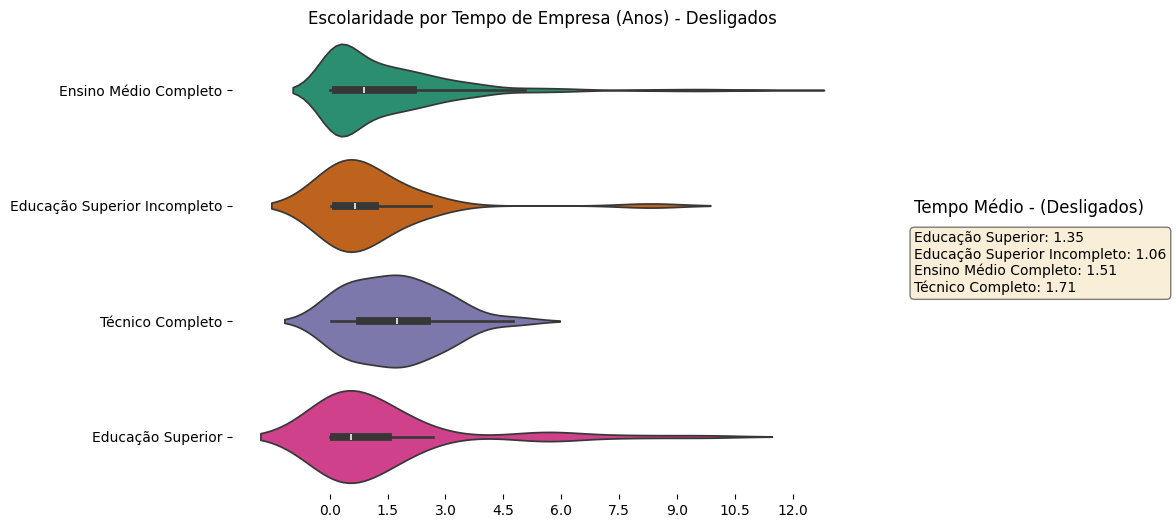

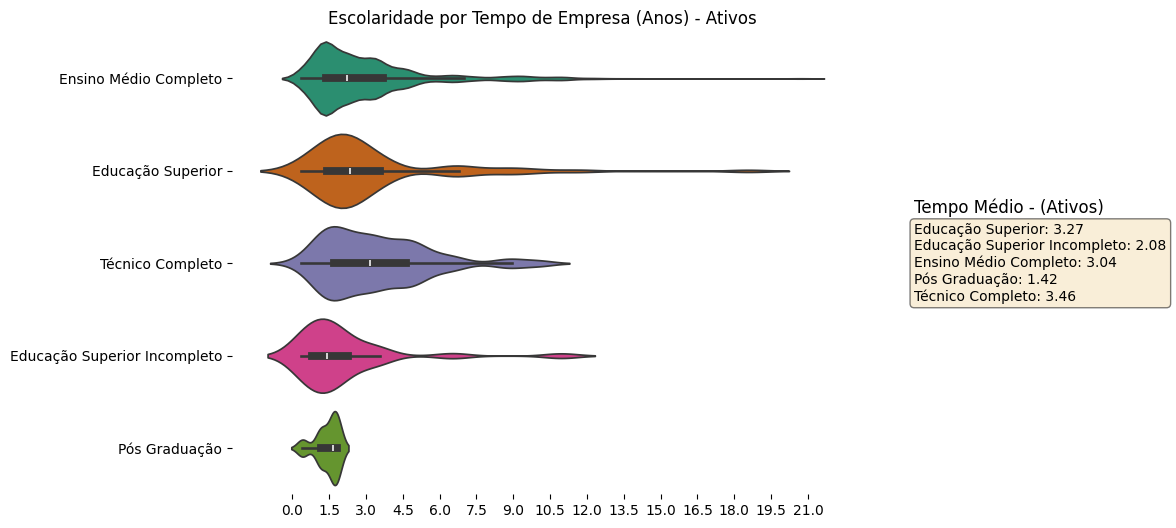

In [37]:
# @title Grafico de Tempo de Empresa por Escolaridade - ViolinPlot - Ativos e Desligados

# Filtrando os dados para Situacao igual a 0

dados_situacao_0 = dados_filtrados[dados_filtrados['Situacao'] == 0]

# Calculando as médias para cada categoria de escolaridade (Situação 0)
medias_por_escolaridade_situacao_0 = dados_situacao_0.groupby('Escolaridade')['Tempo de Empresa'].mean()

# Plotando o gráfico para Situação 0
fig, ax = plt.subplots(figsize=figsize)
sns.violinplot(data=dados_situacao_0, x='Tempo de Empresa', y='Escolaridade', hue='Escolaridade', inner='box', palette='Dark2', ax=ax, legend=False)
plt.title('Escolaridade por Tempo de Empresa (Anos) - Desligados')

# Adicionando a caixa de texto com as médias ao lado do gráfico (Situação 0)
textstr_situacao_0 = '\n'.join(f'{escolaridade}: {media:.2f}' for escolaridade, media in medias_por_escolaridade_situacao_0.items())
ax.text(1.1, 0.5, textstr_situacao_0, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

# Adicionando um título à caixa de texto das médias (Situação 0)
ax.text(1.1, 0.6, 'Tempo Médio - (Desligados)', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Removendo o título do eixo y (Situação 0)
ax.set_ylabel('')

# Removendo o título do eixo x (Situação 0)
ax.set_xlabel('')

# Definindo os ticks do eixo x com incrementos de 1.5 (Situação 0)
plt.xticks(np.arange(0, dados_situacao_0['Tempo de Empresa'].max() + 1.5, 1.5))


sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

# Filtrando os dados para Situacao igual a 1
dados_situacao_1 = dados_filtrados[dados_filtrados['Situacao'] == 1]

# Calculando as médias para cada categoria de escolaridade (Situação 1)
medias_por_escolaridade_situacao_1 = dados_situacao_1.groupby('Escolaridade')['Tempo de Empresa'].mean()

# Plotando o gráfico para Situação 1
fig, ax = plt.subplots(figsize=figsize)
sns.violinplot(data=dados_situacao_1, x='Tempo de Empresa', y='Escolaridade', hue='Escolaridade', inner='box', palette='Dark2', ax=ax, legend=False)
plt.title('Escolaridade por Tempo de Empresa (Anos) - Ativos')

# Adicionando a caixa de texto com as médias ao lado do gráfico (Situação 1)
textstr_situacao_1 = '\n'.join(f'{escolaridade}: {media:.2f}' for escolaridade, media in medias_por_escolaridade_situacao_1.items())
ax.text(1.1, 0.5, textstr_situacao_1, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

# Adicionando um título à caixa de texto das médias (Situação 1)
ax.text(1.1, 0.6, 'Tempo Médio - (Ativos)', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Removendo o título do eixo y (Situação 1)
ax.set_ylabel('')

# Definindo os ticks do eixo x com incrementos de 1.5 (Situação 1)
plt.xticks(np.arange(0, dados_situacao_1['Tempo de Empresa'].max() + 1.5, 1.5))

# Removendo o título do e
ax.set_xlabel('')

sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()



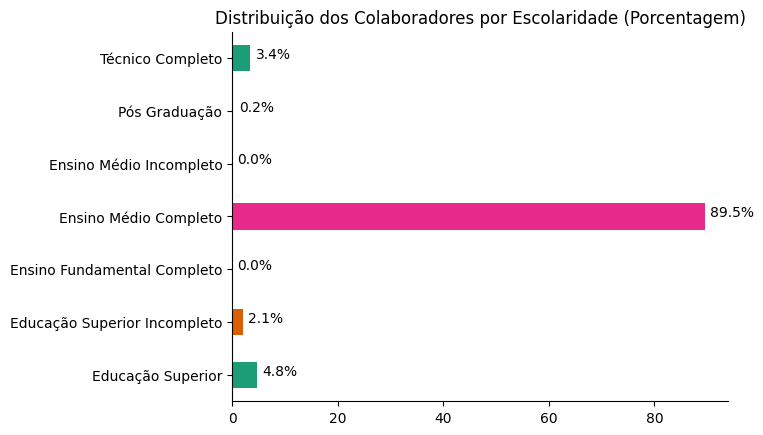

In [11]:
# @title Escolaridade

# Calculando as porcentagens de cada nível de escolaridade
porcentagens_escolaridade = dados.groupby('Escolaridade').size() / len(dados) * 100

# Plotando o gráfico de barras
ax = porcentagens_escolaridade.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Removendo o título do eixo y
plt.gca().set_ylabel('')

# Adicionando texto com as porcentagens ao lado de cada barra
for i, v in enumerate(porcentagens_escolaridade):
    ax.text(v + 1, i, f'{v:.1f}%', color='black')

# Configurando o título do gráfico
plt.title('Distribuição dos Colaboradores por Escolaridade (Porcentagem)')

# Removendo as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


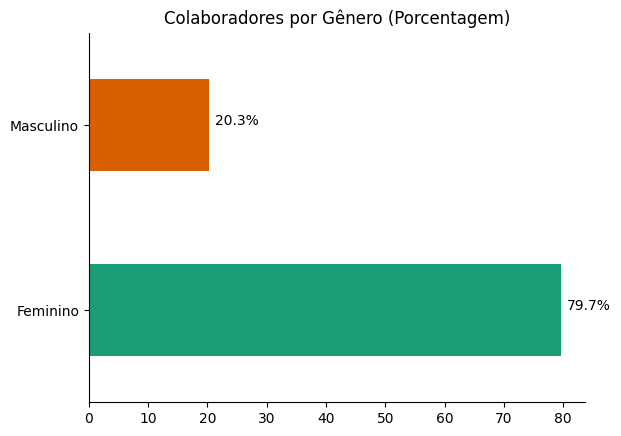

In [12]:
# @title Gênero

# Calcular as porcentagens de cada gênero
porcentagens = dados.groupby('Sexo').size() / len(dados) * 100

# Plotar o gráfico de barras
ax = porcentagens.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Remover o título do eixo y
plt.gca().set_ylabel('')

# Adicionar texto com as porcentagens ao lado de cada barra
for i, v in enumerate(porcentagens):
    ax.text(v + 1, i, f'{v:.1f}%', color='black')

# Remover as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Configurar título do gráfico
plt.title('Colaboradores por Gênero (Porcentagem)')

plt.show()


# Análises Preditivas

Nesse segundo módulo vamos trabalhar com análises preditivas e utilizar algumas técnicas de Machine Learning.

# Correlação

In [85]:
import pandas as pd

# Supondo que 'dados' seja seu DataFrame contendo os dados
df = pd.DataFrame(dados, columns=['Atingimento BSC', 'IDADE','Tempo de Empresa', 'Quantidade de Atestados', 'Quantidade de Faltas', 'Quantidade de Atrasos'])

# Calcular as correlações
correlation_tempo = df['Atingimento BSC'].corr(df['Tempo de Empresa'])
correlation_atestados = df['Atingimento BSC'].corr(df['Quantidade de Atestados'])
correlation_faltas = df['Atingimento BSC'].corr(df['Quantidade de Faltas'])
correlation_atrasos = df['Atingimento BSC'].corr(df['Quantidade de Atrasos'])

# Imprimir os resultados
print(f"Correlação entre Atingimento BSC e Tempo de Empresa: {correlation_tempo:.2f}")
print(f"Correlação entre Atingimento BSC e Quantidade de Atestados: {correlation_atestados:.2f}")
print(f"Correlação entre Atingimento BSC e Quantidade de Faltas: {correlation_faltas:.2f}")
print(f"Correlação entre Atingimento BSC e Quantidade de Atrasos: {correlation_atrasos:.2f}")


Correlação entre Atingimento BSC e Tempo de Empresa: -0.00
Correlação entre Atingimento BSC e Quantidade de Atestados: -0.45
Correlação entre Atingimento BSC e Quantidade de Faltas: -0.61
Correlação entre Atingimento BSC e Quantidade de Atrasos: -0.77


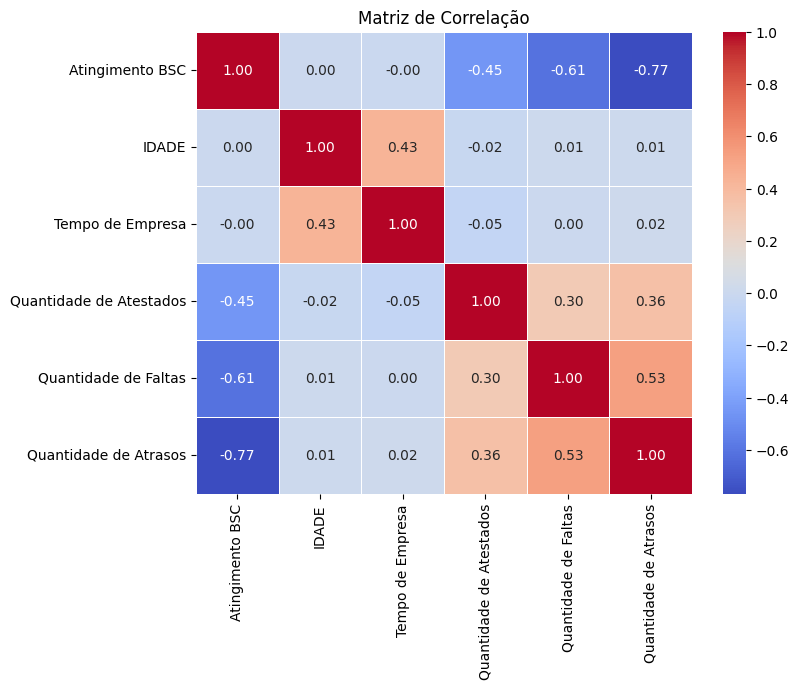

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plotando o mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


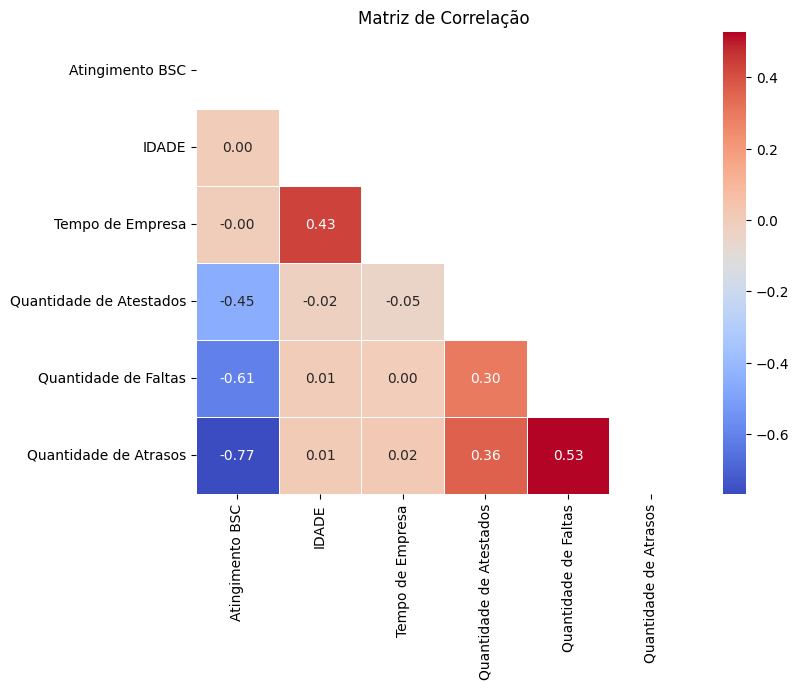

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Máscara para ocultar a metade superior da matriz de correlação
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotando o mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


# Modelo de previsão de turnover

In [70]:
import pandas as pd

# Criando um novo DataFrame
df_novo = dados[['Tempo de Empresa','IDADE', 'Atingimento BSC',
                 'Quantidade de Faltas', 'Quantidade de Atrasos', 'Quantidade de Atestados', 'Situacao']]


print(df_novo.head())




   Tempo de Empresa      IDADE  Atingimento BSC  Quantidade de Faltas  \
0          6.309589  27.383562             0.41                     2   
1          5.312329  26.405479             0.05                     3   
2          5.115068  24.906849             0.38                     3   
3          0.142466  37.695890             0.74                     2   
4          2.454795  33.290411             0.01                     0   

   Quantidade de Atrasos  Quantidade de Atestados  Situacao  
0                      1                        7         0  
1                      6                        0         0  
2                      7                        2         0  
3                      1                        3         0  
4                      1                        2         0  


<Axes: xlabel='Tempo de Empresa', ylabel='Situacao'>

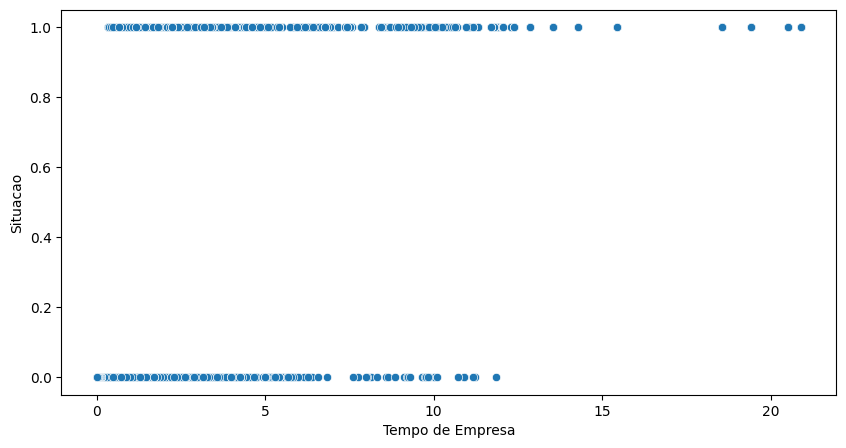

In [72]:
plt.figure( figsize=(10,5))
sns.scatterplot(data=df_novo, x='Tempo de Empresa', y='Situacao')

In [78]:
Caracteristica = df_novo.iloc[:,1:6].values
Previsor = df_novo.iloc[:,6:7].values

In [79]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split( Caracteristica, Previsor, test_size =0.20 )

In [80]:
print( len(x_treino) )
print( len(x_teste) )

13200
3300


In [81]:
from sklearn.linear_model import LogisticRegression

# Criando e ajustando o modelo de regressão logística
Funcao_Logistica = LogisticRegression()
Funcao_Logistica.fit(x_treino, y_treino.ravel())



LogisticRegression()

In [83]:
from sklearn.metrics import classification_report

print (classification_report(y_teste, Previsoes))

              precision    recall  f1-score   support

           0       0.07      0.02      0.03       202
           1       0.94      0.98      0.96      3098

    accuracy                           0.92      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.89      0.92      0.90      3300



# Simulação para novo colaborador


In [106]:
# Simulação de novo colaborador
IDADE = 25
Tempo_de_Empresa = 1
Quantidade_de_Atestados = 0
Quantidade_de_Faltas = 0
Quantidade_de_Atrasos = 3
Atingimento_BSC = 0.9

# Criando array de características para o novo colaborador
novo_colaborador = [[IDADE, Atingimento_BSC, Quantidade_de_Faltas, Quantidade_de_Atrasos, Quantidade_de_Atestados]]

# Fazendo previsão para o novo colaborador
previsao_novo_colaborador = Funcao_Logistica.predict(novo_colaborador)

print("Previsão para o novo colaborador:", previsao_novo_colaborador)

Previsão para o novo colaborador: [1]


# Fazendo Previsão

Nessa estapa vamos colocar dados aleatórios para fazer uma previsão

IDADE  Atingimento BSC  Quantidade de Faltas  Quantidade de Atrasos  Quantidade de Atestados  Situacao

# EM DESENVOLVIMENTO

Tratamento de dados - Etapa 2

Nessa etapa vamos transformar os dados categoricos para numéricos.
Sendo assim podemos aplicar as tecnicas de Machine Learning.


In [ ]:
S!pip install category_encoders

In [16]:
import category_encoders as ce

In [ ]:
dados['Sexo']

In [25]:
from category_encoders.one_hot import OneHotEncoder

Data Admissão
Tempo de Empresa
Sexo
Sexo_num
Escolaridade
Escolaridade_num
Estado Civil
Estado_Civil_num
Deficiente
Deficiente_num
Data de Nasc
IDADE
Atingimento BSC
Quantidade de Faltas
Quantidade de Atrasos
Quantidade de Atestados
Dias
Situacao
Data Desl/Cessão

In [72]:
# Codificando os dados
one_hot_enc = OneHotEncoder(cols=['Sexo','Escolaridade','Estado Civil','Deficiente','Status'])

In [ ]:
dados.select_dtypes(include='object').describe()

In [74]:
one_dados_cats = dados.select_dtypes(include='object')

In [ ]:
one_dados_cats.describe()

In [ ]:
one_hot_enc.fit_transform(one_dados_cats)

In [ ]:
dfOneHot = pd.get_dummies(dados['Situacao'], prefix='Situacao')
dados = pd.concat([dados, dfOneHot], axis=1)

dados = dados.drop(['Situacao'], axis=1)

print(dados.head())



In [ ]:
print(dados.columns)


# Solucionando Questões de multicolinearidade.

Uma das variáveis Dummy dever ser descartada.
Verificar a multicolinearidade atratés do Varience Inflation Factor (VIF)


* VIF =1, menos multicolinearidade
* VIF <5, multicolinearidade moderada
* VIF >5, multicolinearidade extrema

In [ ]:
import statsmodels.api as sm

def calculate_vif(one_dados_cats):
  vif_df = pd.one_dados_cats(columns = ['Var', 'Vif'])
  x_var_names = df.colums

  for i in range(0, var_x_names.shape[0]):
    y = df[x_var_names[i]]
    x = df[x_var_names.drop([x_var_names[i]])]
    r_square = sm.OLS(y,x).fit().rsquared

    vif = round(1/(1-r_square),2)
    vif_df.loc[i] = [x_var_names[i], vif]
  return vif_df.sort_values(by='Vif',axis = 0, ascending = False, inplace =False)

X = df.drop(['Status'],axis=1)
calculate_vif(x)



